In [53]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

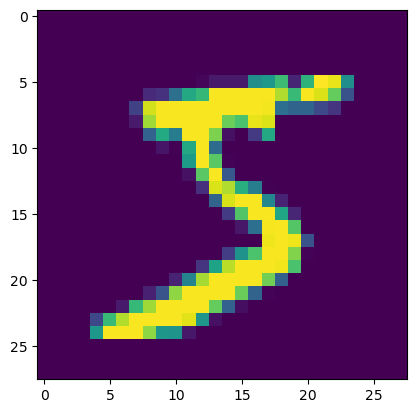

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])

In [55]:

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [56]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [57]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [58]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [59]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2564 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1031 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0369 - accuracy: 0.9885


In [60]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9782
test_acc: 0.9782000184059143


In [61]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [62]:
tf.test.is_built_with_cuda()

False

In [63]:
tf.config.list_physical_devices('GPU')
tf.__version__

'2.10.0'

***Classification using Deep Learning***

In [115]:
from keras.datasets import imdb

(train_data, train_label), (test_data,test_label) = imdb.load_data(num_words=10000)

In [65]:
#Reverting integers to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [66]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [67]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [49]:
train_data.shape

(25000,)

In [50]:
len(train_data)

25000

In [69]:
len(train_data[0])

218

Training data turns out to have a shape of (25000, n) where n is the number of words per review.

In [120]:
import numpy as np

def one_hot_vector(word_sequences, dimension = 10000): #Each review being a one-hot of the 10000 words
    one_hot = np.zeros((len(word_sequences), dimension))
    for index, word_sequence in enumerate(word_sequences):
        one_hot[index, word_sequence] = 1. #Numpy accepts float here instead of int due to np.zeros
    return one_hot

x_train = one_hot_vector(train_data)
x_test = one_hot_vector(test_data)

y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [121]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [122]:
#Partitioning a validation set
x_val = x_train[:10000] #First 10000 reviews are for validation
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [123]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 42ms/step - loss: 0.5161 - acc: 0.7935 - val_loss: 0.3896 - val_acc: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3092 - acc: 0.9043 - val_loss: 0.3060 - val_acc: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2317 - acc: 0.9249 - val_loss: 0.2808 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1797 - acc: 0.9421 - val_loss: 0.2780 - val_acc: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1492 - acc: 0.9527 - val_loss: 0.2775 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1268 - acc: 0.9597 - val_loss: 0.2989 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1034 - acc: 0.9683 - val_loss: 0.3211 - val_acc: 0.8806
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0886 - a

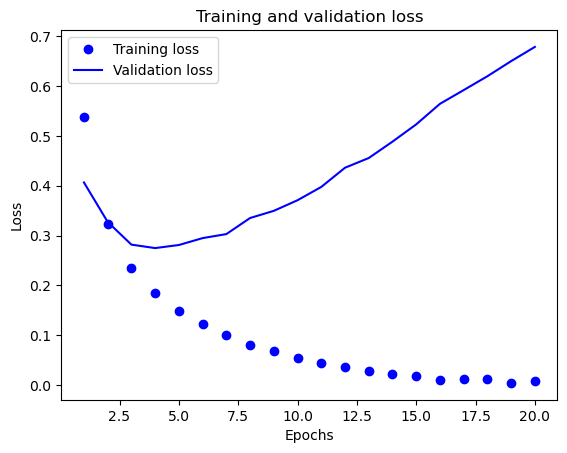

In [94]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

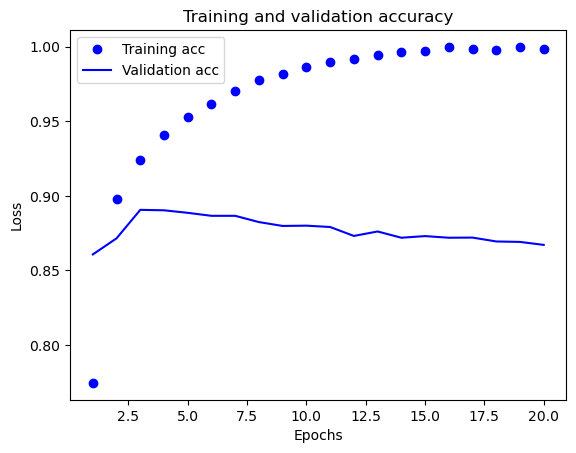

In [96]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As seen in the figures, the neural network peaks at 4 epochs.

In [97]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4383 - accuracy: 0.8173
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2517 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1962 - accuracy: 0.9286
Epoch 4/4
782/782 [==============================] - 13s 16ms/step - loss: 0.3209 - accuracy: 0.8744


[0.32091811299324036, 0.8744400143623352]

**Multiclass Classification via Deep Learning**

In [130]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=15000) #Used 15k instead of 10k words just to experiment

In [125]:
display([len(train_data),len(test_data)])

[8982, 2246]

In [129]:
display(test_data)

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 13086, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13,

In [136]:
#Reuse one_hot_vector

x_train = one_hot_vector(train_data, 15000)
x_test = one_hot_vector(test_data, 15000)

y_train = to_categorical(train_label)
y_test = to_categorical(test_label)


An alternative to the one_hot function we made:

```
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
```

In [137]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(15000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [138]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics  = ['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [139]:
model_record = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.6272 - accuracy: 0.4731 - val_loss: 1.7198 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.3718 - accuracy: 0.7166 - val_loss: 1.2799 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 1.0009 - accuracy: 0.7835 - val_loss: 1.1167 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.7800 - accuracy: 0.8360 - val_loss: 1.0294 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6153 - accuracy: 0.8715 - val_loss: 0.9469 - val_accuracy: 0.8120
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4844 - accuracy: 0.8980 - val_loss: 0.9303 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.3853 - accuracy: 0.9168 - val_loss: 0.9022 - val_accuracy: 0.8140
Epoch 8/20
16

In [144]:
model_record_dict = model_record.history
model_record_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

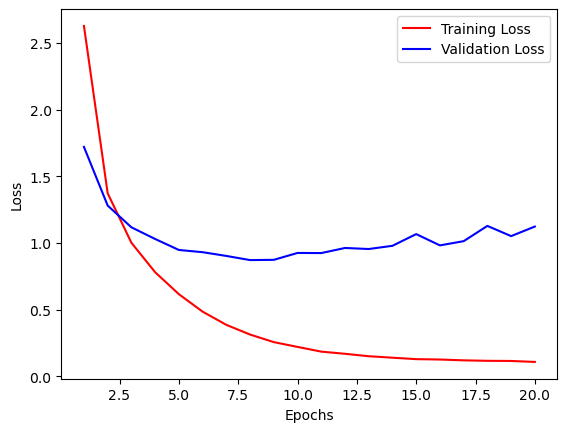

In [151]:
loss = model_record.history['loss']
val_loss = model_record.history['val_loss']

acc = model_record.history['accuracy']
val_acc = model_record.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

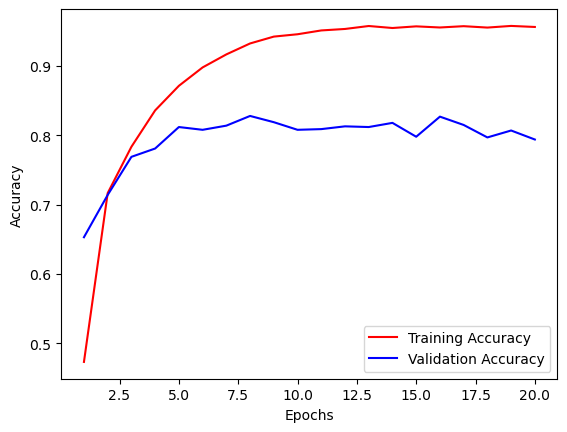

In [152]:
plt.clf()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Figures show that the model peaks at around 9 epochs

In [153]:
#Retraining model
model_record = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)

display(results)

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 0.1080 - accuracy: 0.9574 - val_loss: 1.0481 - val_accuracy: 0.8110
Epoch 2/9
16/16 [==============================] - 1s 37ms/step - loss: 0.1036 - accuracy: 0.9562 - val_loss: 1.1363 - val_accuracy: 0.8030
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 0.1037 - accuracy: 0.9589 - val_loss: 1.2350 - val_accuracy: 0.7750
Epoch 4/9
16/16 [==============================] - 1s 35ms/step - loss: 0.1002 - accuracy: 0.9579 - val_loss: 1.1021 - val_accuracy: 0.8060
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.1035 - accuracy: 0.9590 - val_loss: 1.1723 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.0992 - accuracy: 0.9555 - val_loss: 1.1374 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 0.0952 - accuracy: 0.9587 - val_loss: 1.1764 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===

[1.3719018697738647, 0.7818343639373779]

**Regression via Deep Learning**

In [155]:
from keras.datasets import boston_housing

(train_data, train_label), (test_data, test_label) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [158]:
train_data

#With great differences across variables, it is wise to standardize/normalize the data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [163]:
normalized_x_train = (train_data-np.mean(train_data, axis=0))/np.std(train_data, axis=0)
normalized_x_test = (test_data-np.mean(test_data, axis = 0))/np.std(test_data, axis = 0)

display([normalized_x_train, normalized_x_test])

[array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
          0.44807713,  0.8252202 ],
        [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
          0.43190599, -1.32920239],
        [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
          0.22061726, -1.30850006],
        ...,
        [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
          0.07943894, -0.67776904],
        [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
         -0.98764362,  0.42083466],
        [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
          0.23317118, -1.15392266]]),
 array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
         -4.27829517,  2.51324773],
        [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
          0.3909446 ,  0.58604286],
        [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
          0.41570668, -0.38506427],
        ...,
        [-0.23539182, -0.50784934,  1.17955762, ..., -